#**GRADUATE** **ADMISSION** **PREDICTION**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#The parameters included are :
    1.GRE Scores ( out of 340 )
    2.TOEFL Scores ( out of 120 )
    3.University Rating ( out of 5 )
    4.Statement of Purpose 
    5.Letter of Recommendation Strength ( out of 5 )
    6.Undergraduate GPA/CGPA ( out of 10 )
    7.Research Experience ( either 0 or 1 )
    8.Chance of Admit ( ranging from 0 to 1 )

# Data Loading

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
df=pd.read_csv(r"C:\Users\Dev Patel\Documents\Collage_files\Team_4331 (COE) Project\admission_data.csv")
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
#metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Insights from metadata
    1. No Null values
    2. No need of other pre processing    

# Data Exploration

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<AxesSubplot:>

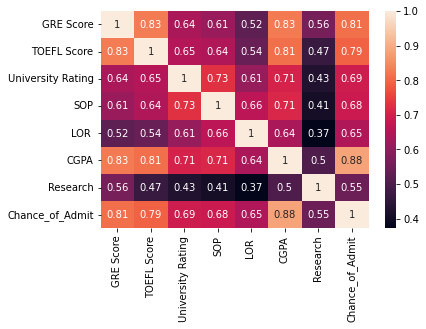

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [8]:
col_name=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit']

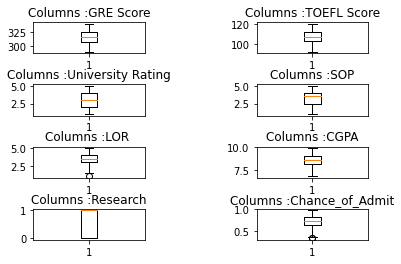

In [9]:
#explore
for i in range(8):
  plt.subplot(4,2,i+1)
  plt.boxplot(df[col_name[i]])
  plt.title("Columns :{}".format(col_name[i]))
  plt.subplots_adjust(wspace=1,hspace=1)


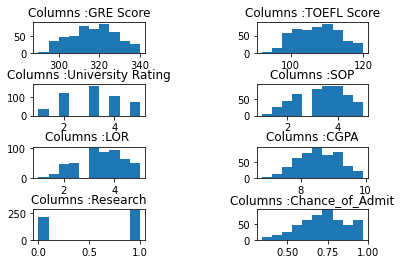

In [10]:
#explore
for i in range(8):
  plt.subplot(4,2,i+1)
  plt.hist(df[col_name[i]])
  plt.title("Columns :{}".format(col_name[i]))
  plt.subplots_adjust(wspace=1,hspace=1)
 

In [11]:
# sns.boxplot('Chance_of_Admit',data=df)

C:\Users\Dev Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chance_of_Admit'>

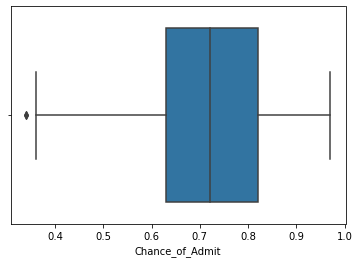

In [12]:
sns.boxplot('Chance_of_Admit',data=df)

C:\Users\Dev Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOR '>

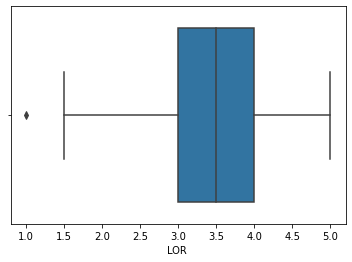

In [13]:
sns.boxplot('LOR ',data=df)

# Insights from data Exploration 
    1. Negligible outliers #how?
    

# Multiple Linear Regression (attempt1)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
MLR=LinearRegression()

In [16]:
x= df.iloc[:, :-1].values  
y= df.iloc[:, 4].values    

In [17]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
print(x)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]


In [19]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0) 

In [20]:
MLR.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred= MLR.predict(x_test)  

In [22]:
print('Train Score: ', MLR.score(x_train, y_train))  
print('Test Score: ', MLR.score(x_test, y_test))  

Train Score:  1.0
Test Score:  1.0


In [23]:
len(y_test)

100

In [24]:
len(y_pred)

100

In [25]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [26]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 5.750955267558311e-16
MSE: 5.881944124554169e-31
RMSE: 7.6693833680121695e-16
R-Squared: 1.0


In [27]:
# MLR.predict([[337.,118.,4.,3.,4.5,9.65,1. ]])
# GRE Score	TOEFL Score	University Rating	SOP	LOR	CGPA	Research

In [28]:
# MLR.predict([[337,	118,	4,	4.5,	4.5,	9.65,0	]])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [30]:
mae

5.750955267558311e-16

In [31]:
mse

5.881944124554169e-31

In [32]:
rmse

7.6693833680121695e-16

# Multiple Linear Regression (attempt 2 KIRTAN)

## GRE

In [33]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [34]:
df_gre=df.drop(["TOEFL Score"],axis=1)
df_gre

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,332,5,4.5,4.0,9.02,1,0.87
496,337,5,5.0,5.0,9.87,1,0.96
497,330,5,4.5,5.0,9.56,1,0.93
498,312,4,4.0,5.0,8.43,0,0.73


<AxesSubplot:>

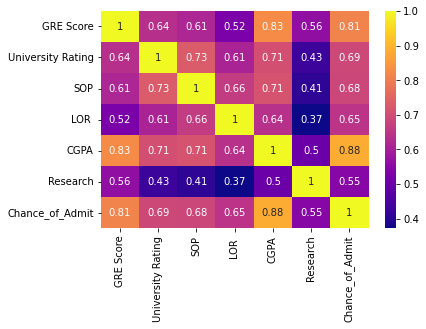

In [35]:
sns.heatmap(df_gre.corr(),annot=True,cmap="plasma")

<AxesSubplot:xlabel='CGPA', ylabel='Chance_of_Admit'>

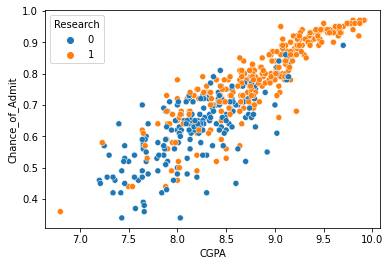

In [36]:
sns.scatterplot(x="CGPA",y="Chance_of_Admit",data=df_gre,hue="Research")

<AxesSubplot:xlabel='GRE Score', ylabel='Chance_of_Admit'>

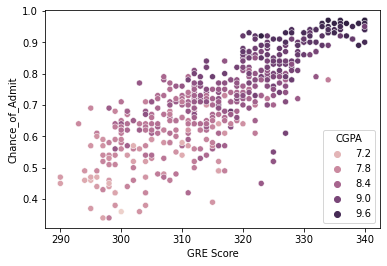

In [37]:
sns.scatterplot(x="GRE Score",y="Chance_of_Admit",data=df_gre,hue="CGPA")

<AxesSubplot:xlabel='GRE Score', ylabel='Chance_of_Admit'>

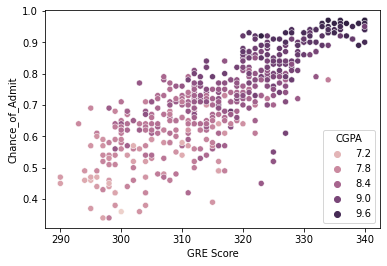

In [38]:
sns.scatterplot(x="GRE Score",y="Chance_of_Admit",data=df_gre,hue="CGPA")

In [39]:
df_gre.shape

(500, 7)

In [40]:
df_gre.columns

Index(['GRE Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [46]:
X=df_gre.drop('Chance_of_Admit',axis=1)
y=df_gre['Chance_of_Admit']

In [47]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit, Length: 500, dtype: float64

In [48]:
df_gre.columns

Index(['GRE Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
len(X_train)
len(X_test)

165

In [51]:
model=LinearRegression()

In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
test_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,test_pred)
mse=mean_squared_error(y_test,test_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list1=[mae,mse,rmse]

0.042567844523082654
0.003619741854714961
0.060164290527811935


In [55]:
mae

0.042567844523082654

In [56]:
mse

0.003619741854714961

In [57]:
rmse

0.060164290527811935

In [58]:
# model.predict([[227 ,	2 ,	4. ,	3.5 	,7.65 ,	1]])

## TOEFL

In [59]:
df_toefl=df.drop(["GRE Score"],axis=1)
df_toefl

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,108,5,4.5,4.0,9.02,1,0.87
496,117,5,5.0,5.0,9.87,1,0.96
497,120,5,4.5,5.0,9.56,1,0.93
498,103,4,4.0,5.0,8.43,0,0.73


<AxesSubplot:>

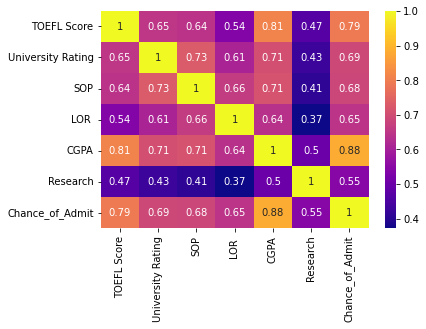

In [60]:
sns.heatmap(df_toefl.corr(),annot=True,cmap="plasma")

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance_of_Admit'>

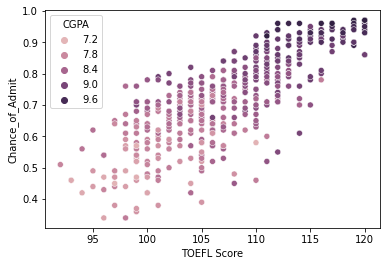

In [61]:
sns.scatterplot(x="TOEFL Score",y="Chance_of_Admit",data=df_toefl,hue="CGPA")

In [62]:
df_toefl.shape

(500, 7)

In [63]:
X=df_toefl.drop("Chance_of_Admit",axis=1)
y=df_toefl['Chance_of_Admit']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
test_pred=model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,test_pred)
mse=mean_squared_error(y_test,test_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list2=[mae,mse,rmse]

0.04357524433205943
0.003666216316933468
0.06054928832722535


In [68]:
mae

0.04357524433205943

In [69]:
mse

0.003666216316933468

In [70]:
rmse

0.06054928832722535

# Polynomial Regression

## GRE

In [187]:
X=df_gre.drop("Chance_of_Admit",axis=1)
y=df_gre['Chance_of_Admit']

In [188]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [189]:
poly_features=polynomial_converter.fit_transform(X)

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
gre_polynomial_model=LinearRegression()

In [193]:
gre_polynomial_model.fit(X_train,y_train)

LinearRegression()

In [194]:
test_prediction=gre_polynomial_model.predict(X_test)

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,test_prediction)
mse=mean_squared_error(y_test,test_prediction)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list3=[mae,mse,rmse]

0.04146581574045006
0.00360764080771452
0.06006363964758146


In [196]:
MAE=mean_absolute_error(y_test,test_prediction)
MAE

0.04146581574045006

In [197]:
MSE=mean_squared_error(y_test,test_prediction)
MSE

0.00360764080771452

In [198]:
RMSE=np.sqrt(MSE)
RMSE

0.06006363964758146

##TOEFL

In [244]:
x=df_toefl.drop("Chance_of_Admit",axis=1)
y=df_toefl['Chance_of_Admit']

In [245]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [246]:
poly_features=polynomial_converter.fit_transform(x)

In [247]:
toefl_polynomial_model=LinearRegression()

In [248]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [249]:
toefl_polynomial_model.fit(X_train,y_train)

LinearRegression()

In [250]:
y_pred=toefl_polynomial_model.predict(X_test)

In [ ]:
pred=toefl_polynomial_model.predict([[X_test]])

In [237]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list4=[mae,mse,rmse]

0.04146581574045006
0.00360764080771452
0.06006363964758146


In [207]:
print(f"{list1}\n{list3}")

[0.042567844523082654, 0.003619741854714961, 0.060164290527811935]
[0.04146581574045006, 0.00360764080771452, 0.06006363964758146]


In [208]:
print(f"{list2}\n{list4}")

[0.04357524433205943, 0.003666216316933468, 0.06054928832722535]
[0.04146581574045006, 0.00360764080771452, 0.06006363964758146]


In [93]:
error=[[list1,list3]]
data=pd.DataFrame(error,index=['MLR','Poly'])#,columns=['mae','mse','rmse'])
data

,0,1
MLR,"[0.042567844523082654, 0.003619741854714961, 0...","[0.04244206361767354, 0.0035592010816131083, 0..."
Poly,"[0.042567844523082654, 0.003619741854714961, 0...","[0.04244206361767354, 0.0035592010816131083, 0..."


### IGNORE FROM HERE

In [94]:
train_rmse_errors=[]
test_rmse_errors=[]

#we will take upto 10 order
for d in range(1,10): # d stands for degree
    polynomial_converter= PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_prediction=model.predict(X_train)
    test_prediction=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_prediction))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_prediction))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [95]:
train_rmse_errors

[0.06146163665049046,
 0.05856009599127396,
 0.05554450593240071,
 0.043157847070139976,
 0.0038902987426605545,
 0.0026536171375760066,
 0.0051314695876201345,
 0.0051022689715006855,
 0.006036668468243906]

In [96]:
test_rmse_errors

[0.058026441426963955,
 0.05830471387345835,
 0.06779884995786918,
 0.22320292102460987,
 10.511601395741666,
 12.899294666019061,
 12.59848465539024,
 12.74135163246639,
 12.962925484833878]

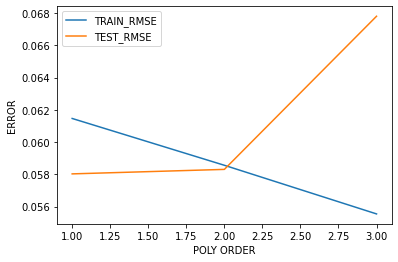

In [97]:
plt.plot(range(1,4),train_rmse_errors[:3],label='TRAIN_RMSE')
plt.plot(range(1,4),test_rmse_errors[:3],label='TEST_RMSE')

plt.xlabel('POLY ORDER')
plt.ylabel('ERROR')
plt.legend()

whole list

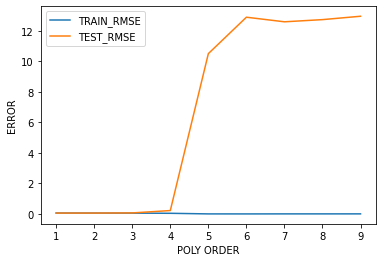

In [98]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN_RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST_RMSE')

plt.xlabel('POLY ORDER')
plt.ylabel('ERROR')
plt.legend()

## Polynomial Regression insights
  1. The polynomial regression is giving equivalent result to multiple linear regression for degree=1.
  2. Its performance decreases gradually on increase in degree.

#ElasticNetCV Regression 


###GRE

In [99]:
# X=df_gre.drop("Chance_of_Admit",axis=1)
# y=df_gre['Chance of Admit ']

In [100]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)


In [101]:
poly_features=polynomial_converter.fit_transform(X)

In [102]:
poly_features.shape

(500, 83)

In [105]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(poly_features, q, test_size=0.3, random_state=42)

In [106]:
X_train.shape

(350, 5004)

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler=StandardScaler()

In [109]:
X_train=scaler.fit_transform(X_train)

In [110]:
X_test=scaler.transform(X_test)

In [111]:
from sklearn.linear_model import ElasticNetCV

In [112]:
elastic_net_model=ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],n_alphas=100,eps=0.001,max_iter=100000)

In [113]:
#elastic_net_model.fit(X_train,y_train)


KeyboardInterrupt



In [ ]:
#elastic_net_model.l1_ratio_

In [ ]:
#elastic_net_model.alpha_

In [ ]:
#test_predictions=elastic_net_model.predict(X_test)

In [ ]:
#from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
#MAE=mean_absolute_error(y_test,test_predictions)
#MAE

In [ ]:
#MSE=mean_squared_error(y_test,test_predictions)
#MSE

In [ ]:
#RMSE=np.sqrt(MSE)
#RMSE

#Elastic Net Regression


##GRE

In [114]:
from sklearn.linear_model import ElasticNet

In [115]:
x=df_gre.drop("Chance_of_Admit",axis=1)
y=df_gre['Chance_of_Admit']

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
# Create an Elastic Net regression object
en_reg = ElasticNet(alpha=0.001)#,l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1],max_iter=100000)#, l1_ratio=0.5,random_state=42)

In [118]:
# Fit the model to the training data
en_reg.fit(X_train, y_train)

ElasticNet(alpha=0.001)

In [119]:

# Make predictions on the testing data
y_pred = en_reg.predict(X_test)

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list5=[mae,mse,rmse]

0.043686636200045516
0.0036795502433823587
0.06065929642999792


## TOEFL

In [121]:
X=df_toefl.drop("Chance_of_Admit",axis=1)
y=df_toefl['Chance_of_Admit']

In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
# Create an Elastic Net regression object
en_reg = ElasticNet(alpha=0.001,max_iter=1000)#, l1_ratio=0.5,random_state=42)

In [124]:
# Fit the model to the training data
en_reg.fit(X_train, y_train)

ElasticNet(alpha=0.001)

In [125]:
# Make predictions on the testing data
y_pred = en_reg.predict(X_test)

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list6=[mae,mse,rmse]

0.043686636200045516
0.0036795502433823587
0.06065929642999792


In [127]:
print(f"mlr ={list1}\n poly={list3}\nelastic net={list5}")

mlr =[0.042567844523082654, 0.003619741854714961, 0.060164290527811935]
 poly=[0.04244206361767354, 0.0035592010816131083, 0.0596590402337576]
elastic net=[0.043686636200045516, 0.0036795502433823587, 0.06065929642999792]


# Random Forest Regression

## GRE

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
x=df_gre.drop("Chance_of_Admit",axis=1)
y=df_gre['Chance_of_Admit']

In [130]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [131]:
# Create a Random Forest regression object with 100 trees
rf_reg = RandomForestRegressor(n_estimators=100)

In [132]:
# Fit the model to the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
# Make predictions on the testing data
y_pred = rf_reg.predict(X_test)

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list7=[mae,mse,rmse]

0.04507393939393942
0.0041667483636363715
0.06455035525569454


##  TOEFL


In [135]:
X=df_toefl.drop("Chance_of_Admit",axis=1)
y=df_toefl['Chance_of_Admit']

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [137]:
# Create a Random Forest regression object with 100 trees
rf_reg = RandomForestRegressor(n_estimators=100)

In [138]:
# Fit the model to the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
# Make predictions on the testing data
y_pred = rf_reg.predict(X_test)

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list8=[mae,mse,rmse]

0.04435515151515157
0.004025099757575763
0.06344367389721188


# SVM Regression

## GRE

In [141]:
from sklearn.svm import SVR

In [142]:
x=df_gre.drop("Chance_of_Admit",axis=1)
y=df_gre['Chance_of_Admit']

In [143]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [144]:
# Create an SVM regression object with a linear kernel
svm_reg = SVR(kernel='linear')

In [145]:
# Fit the model to the training data
svm_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [146]:
# Make predictions on the testing data
y_pred = svm_reg.predict(X_test)

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list9=[mae,mse,rmse]

0.049320569411251965
0.004149586322502182
0.0644172827935344


## TOEFL

In [148]:
X=df_toefl.drop("Chance_of_Admit",axis=1)
y=df_toefl['Chance_of_Admit']

In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [150]:
# Create an SVM regression object with a linear kernel
svm_reg = SVR(kernel='linear')

In [151]:
# Fit the model to the training data
svm_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [152]:
# Make predictions on the testing data
y_pred = svm_reg.predict(X_test)

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
list10=[mae,mse,rmse]

0.049320569411251965
0.004149586322502182
0.0644172827935344


# Performance Of All the Models

In [154]:
print("              |    GRE                                                             |     TOEFL      ")
print("______________|____________________________________________________________________|________________________________________________________________________")
print("              |mae                   |mse                  |rmse                   |mae                     |mse                    |rmse                     ")
print(f"MLR           |{list1[0]}   |{list1[1]} |{list1[2]}    |  {list2[0]}   |{list2[1]}   |{list2[2]}   | ")
print(f"POLY REG      |{list3[0]}  |{list3[1]} |{list3[2]}   |  {list4[0]}   |{list4[1]}  |{list4[2]}   | ")
print(f"ELASTICNET REG|{list5[0]}   |{list5[1]}|{list5[2]}    |  {list6[0]}   |{list6[1]}  |{list6[2]}   | ")
print(f"RFR           |{list7[0]}   |{list7[1]} |{list7[2]}    |  {list8[0]}   |{list8[1]}   |{list8[2]}   | ")
print(f"SVM REG       |{list9[0]}  |{list9[1]} |{list9[2]}     |  {list10[0]}  |{list10[1]}   |{list10[2]}    | ")

              |    GRE                                                             |     TOEFL      
______________|____________________________________________________________________|________________________________________________________________________
              |mae                   |mse                  |rmse                   |mae                     |mse                    |rmse                     
MLR           |0.042567844523082654   |0.003619741854714961 |0.060164290527811935    |  0.04357524433205943   |0.003666216316933468   |0.06054928832722535   | 
POLY REG      |0.04244206361767354  |0.0035592010816131083 |0.0596590402337576   |  0.04214814686151191   |0.0036332201406713803  |0.06027619879082771   | 
ELASTICNET REG|0.043686636200045516   |0.0036795502433823587|0.06065929642999792    |  0.043686636200045516   |0.0036795502433823587  |0.06065929642999792   | 
RFR           |0.04507393939393942   |0.0041667483636363715 |0.06455035525569454    |  0.04435515151515157 

 # Model deployment

In [221]:
import pickle

In [222]:
filename='trained_gre_model.sav'
pickle.dump(gre_polynomial_model,open(filename,'wb'))


In [223]:
loaded_model=pickle.load(open('trained_gre_model.sav','rb'))


In [224]:
pred=loaded_model.predict(polynomial_converter.fit_transform([[337,4,4.5,4.5,9.65,1]])) 

In [213]:
print(pred)

[0.94203816]


In [251]:
filename2='trained_toefl_model.sav'
pickle.dump(toefl_polynomial_model,open(filename2,'wb'))

In [252]:
loaded_model2=pickle.load(open('trained_toefl_model.sav','rb'))

In [253]:
pred=loaded_model2.predict(polynomial_converter.fit_transform([[118,4,4.5,4.5,9.65,1]]))

In [254]:
pred

array([0.93804558])

# model is giving acceptable approximate value

In [214]:
pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=e39e3fe370f1a9c5a0452e682e9cf80ec2def9f9ced7e6e79282f89fa7d09805
  Stored in directory: c:\users\dev patel\appdata\local\pip\cache\wheels\58\c6\8b\061bd4edc8cea2b2235758c3e50473d08499236fbfdd21e6b3
Successfully built pickle-mixin
Note: you may need to restart the kernel to use updated packages.
